In [1]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
from IPython.display import display
from __future__ import division
%matplotlib inline

In [2]:
def KS(X,F,name):
    n = len(X)
    Xi = sorted(X)
    Dn = []
    for i in range(n):
        Dn.append(max((i+1)/n-F(Xi[i]),F(Xi[i])-i/n))
    D = max(Dn)
    K = np.argmax(Dn)
    return D

In [3]:
def BondadDAjuste(X,alpha):
    n=len(X)
    Fn = lambda y:len([x for x in X if x<=y])/n
    m = np.mean(X)
    v = np.var(X)
    inf = min(X)
    sup = max(X)
    a = m*((m*(1-m))/v-1)
    b = a*(1-m)/m
    b_ = m**2/v
    a_ = m/v
    display(pd.DataFrame([m,v,inf,sup,a,b,a_,b_],index=['$\mu$','$\sigma^2$','$\min$',
                                                        '$\max$','$\\alpha$','$\\beta$','$\\mu/\\sigma^{2}$',
                                                        '$\\mu^{2}/\\sigma^{2}$']).T)
    F = {'Normal':lambda x:sts.norm.cdf(x,m,v),
        'Exponencial':lambda x:sts.expon.cdf(x,0,m),
        'Uniforme':lambda x:sts.uniform.cdf(x,inf,sup),
        'Beta':lambda x:sts.beta.cdf(x,a,b),
        'Gamma':lambda x:sts.gamma.cdf(x,a_,0,b_)}
    t = np.arange(inf,sup+0.02,0.01)
    Graficas = [plt.plot(t,F[x](t),label=x) for x in F.keys()]
    plt.plot(t,map(Fn,t),label='Empirica')
    plt.legend()
    nDn =lambda l=1:1-2*sum(((-1)**(j-1))*ma.exp(-2*(j**2)*(l**2)) for j in range(1,300))
    Quant = lambda alpha:max(q for q in np.arange(0.01,4,0.01) if nDn(q)<alpha)
    KSs = {x:KS(X,F[x],x) for x in F.keys()}
    Calc = {x:[KSs[x],ma.sqrt(n)*KSs[x],Quant(alpha),ma.sqrt(n)*KSs[x]<=Quant(alpha)] for x in F.keys()}
    display(pd.DataFrame(Calc,index=['$D_n$','$\sqrt{n}D_n$','$q_{%s}$'%alpha,'$H_0$']).T)

,$\mu$,$\sigma^2$,$\min$,$\max$,$\alpha$,$\beta$,$\mu/\sigma^{2}$,$\mu^{2}/\sigma^{2}$
0,1.899271,3.720146,0.001742,14.435468,-2.771246,1.312136,0.510537,0.969647


,$D_n$,$\sqrt{n}D_n$,$q_{0.1}$,$H_0$
Beta,NaN,NaN,0.57,False
Exponencial,0.0161775,0.511578,0.57,True
Gamma,0.462669,14.6309,0.57,False
Normal,0.305002,9.645,0.57,False
Uniforme,0.609464,19.2729,0.57,False


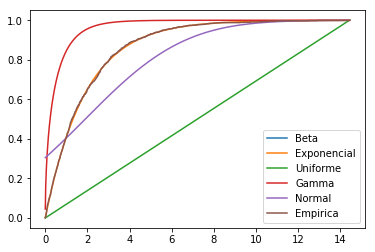

In [4]:
BondadDAjuste(np.random.exponential(2,1000),0.1)